In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
powerlifting = pd.read_pickle('./Data/powerlifting_clean.p')

In [3]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
powerlifting['SexBinary'] = powerlifting.Sex.apply(lambda x: 1 if x == 'F' else 0)

In [5]:
powerlifting['EquipmentBinary'] = powerlifting.Equipment.apply(lambda x: 0 if x == 'Raw' else 1)

In [6]:
clean_mask = (powerlifting['Age'].isnull()==False) & (powerlifting['TotalKg'].isnull()==False)
cleaned = powerlifting.loc[clean_mask]
X = cleaned[['BodyweightKg', 'Age', 'SexBinary', 'EquipmentBinary']]
y = cleaned['TotalKg']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [8]:
params = {
    'alpha': np.logspace(-1, 2, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}

grid = GridSearchCV(ElasticNet(), params, cv = 5, n_jobs = -1)

In [9]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alp

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You m

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ]), 'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [10]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_l1_ratio,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
9,0.240213,0.028913,0.622091,0.622397,0.1,1,"{'l1_ratio': 1.0, 'alpha': 0.1}",1,0.630029,0.620320,...,0.627072,0.621175,0.608036,0.625886,0.623119,0.622186,0.177489,0.052874,0.007569,0.001899
19,0.273941,0.004324,0.622079,0.622383,0.215443,1,"{'l1_ratio': 1.0, 'alpha': 0.215443469003}",2,0.629925,0.620306,...,0.627036,0.621161,0.608062,0.625872,0.623122,0.622172,0.076503,0.003006,0.007533,0.001899
29,0.106603,0.004248,0.622018,0.622319,0.464159,1,"{'l1_ratio': 1.0, 'alpha': 0.464158883361}",3,0.629667,0.620241,...,0.626926,0.621097,0.608081,0.625809,0.623094,0.622109,0.006488,0.002926,0.007458,0.001899
39,0.134963,0.002502,0.621727,0.622022,1,1,"{'l1_ratio': 1.0, 'alpha': 1.0}",4,0.628953,0.619940,...,0.626535,0.620801,0.607965,0.625513,0.622873,0.621812,0.010676,0.000617,0.007299,0.001900
8,0.135670,0.003790,0.621293,0.621579,0.1,0.888889,"{'l1_ratio': 0.888888888889, 'alpha': 0.1}",5,0.628525,0.619502,...,0.625753,0.620365,0.607758,0.625065,0.622465,0.621368,0.022401,0.003665,0.007172,0.001896


In [11]:
grid.score(X_test, y_test)

0.62510520959938687

In [12]:
grid.score(X, y)

0.62307723553440852

In [13]:
predictions = grid.predict(X)
cleaned['predictions'] = predictions

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
residuals = cleaned['TotalKg'].values - cleaned['predictions'].values 
cleaned['residuals'] = residuals

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


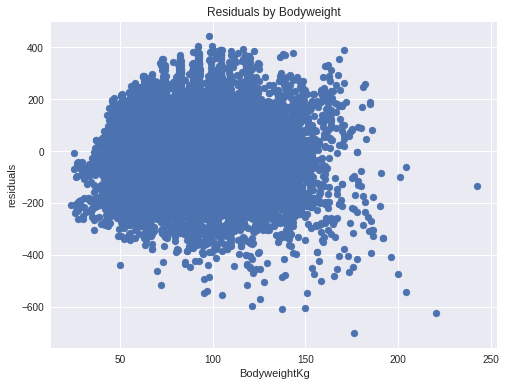

In [15]:
plt.figure(figsize = (8, 6))
plt.scatter(cleaned['BodyweightKg'], cleaned['residuals'])
plt.title('Residuals by Bodyweight')
plt.xlabel('BodyweightKg')
plt.ylabel('residuals')
plt.show()

In [16]:
np.corrcoef(cleaned['BodyweightKg'], cleaned['residuals'])

array([[ 1.        , -0.00132156],
       [-0.00132156,  1.        ]])

In [17]:
list(zip(X.columns, grid.best_estimator_.coef_))

[('BodyweightKg', 3.3966517750294352),
 ('Age', -0.26869721012582515),
 ('SexBinary', -167.52841129257257),
 ('EquipmentBinary', 76.843652380243171)]

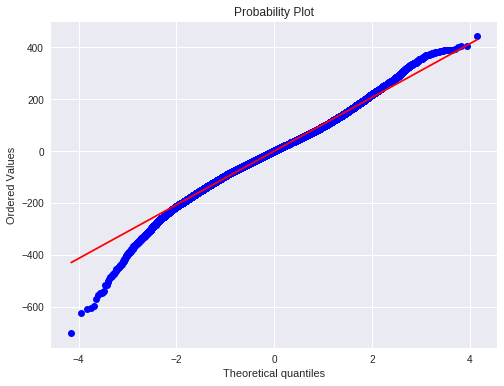

In [18]:
import scipy.stats as stats 
plt.figure(figsize=(8, 6))
stats.probplot(cleaned['residuals'], dist="norm", plot=plt)
plt.show()

In [19]:
cleaned.sort_values('residuals', ascending = True).head(10)

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Team,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,predictions,residuals
48972,58.000000,NaN,NaN,NaN,NaN,25.0,65.0,25.0,1959.0,176.0,...,NaN,115.0,120+,NaN,2017,62.114005,0,0,817.096770,-702.096770
44228,33.000000,105.0,110.0,-117.5,NaN,110.0,130.0,107.5,1984.0,220.2,...,NaN,347.5,120+,NaN,2017,188.188426,0,0,973.946208,-626.446208
15156,56.666667,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,137.4,...,NaN,75.0,125+,NaN,2014,42.030356,0,0,686.344274,-611.344274
27142,46.000000,25.0,NaN,NaN,NaN,25.0,75.0,25.0,1971.0,149.8,...,South Carolina,125.0,120+,NaN,2017,69.174918,0,0,731.328860,-606.328860
8671,71.500000,20.0,NaN,NaN,NaN,20.0,65.0,20.0,NaN,121.0,...,NaN,105.0,125,NaN,2014,60.252109,0,1,703.497162,-598.497162
16582,51.888889,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,125.6,...,NaN,75.0,125+,NaN,2014,42.697148,0,0,647.547559,-572.547559
56606,18.000000,29.5,31.8,36.3,NaN,36.3,36.3,34.0,1999.0,104.9,...,NaN,106.6,105,NaN,2017,63.720535,0,1,663.186369,-556.586369
22157,43.500000,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,95.5,...,NaN,75.0,105,NaN,2014,46.542154,0,1,624.406064,-549.406064
6039,14.000000,37.5,42.5,45.0,NaN,45.0,112.5,37.5,2003.0,150.9,...,NaN,195.0,120+,NaN,2017,107.801778,0,0,743.663487,-548.663487
33248,19.000000,-102.5,112.5,-127.5,NaN,112.5,150.0,117.5,1997.0,204.0,...,NaN,380.0,120+,NaN,2016,202.003448,0,0,922.682211,-542.682211


In [20]:
cleaned.sort_values('residuals', ascending = False).head(10)

,Age,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,BestBenchKg,BestDeadliftKg,BestSquatKg,BirthYear,BodyweightKg,...,Team,TotalKg,WeightClassKg,Wilks,Year,calcWilks,SexBinary,EquipmentBinary,predictions,residuals
71219,27.0,285.0,295.0,297.5,NaN,297.5,375.0,407.5,1990.0,98.11,...,NaN,1080.0,105,NaN,2017,662.429463,0,1,637.704829,442.295171
74194,29.0,280.0,292.0,295.0,NaN,295.0,367.5,385.0,1981.0,99.48,...,NaN,1047.5,100,NaN,2010,638.835313,0,1,641.820847,405.679153
70781,25.0,-280.0,280.0,285.0,NaN,285.0,350.0,387.5,1990.0,92.15,...,NaN,1022.5,93,NaN,2015,645.156245,0,1,617.998179,404.501821
70782,28.0,277.5,287.5,-292.5,NaN,287.5,350.0,380.0,1987.0,92.06,...,NaN,1017.5,93,NaN,2015,642.305393,0,1,616.886388,400.613612
70820,30.0,300.0,312.5,317.5,NaN,317.5,362.5,415.0,1985.0,116.58,...,NaN,1095.0,120,NaN,2015,633.988348,0,1,699.634896,395.365104
73819,40.0,255.0,260.0,-262.5,NaN,260.0,387.5,400.0,1972.0,104.39,...,NaN,1047.5,105,NaN,2012,627.228615,0,1,655.542738,391.957262
73342,31.0,NaN,NaN,NaN,NaN,235.0,377.5,423.0,NaN,100.00,...,NaN,1035.0,100,NaN,1994,629.889689,0,1,643.049712,391.950288
72951,27.0,310.0,-320.0,320.0,NaN,320.0,320.0,410.0,1987.0,104.16,...,NaN,1050.0,105,NaN,2014,629.221757,0,1,658.254572,391.745428
75432,26.0,310.0,323.0,-327.5,NaN,323.0,325.0,402.5,1987.0,104.92,...,NaN,1050.5,105,NaN,2013,627.898072,0,1,661.104725,389.395275
30242,30.0,205.0,365.0,410.0,NaN,410.0,357.5,505.0,1987.0,170.68,...,USA,1272.5,120+,NaN,2017,690.709052,0,1,883.393757,389.106243


In [21]:
# refit the model using bodyweight ^ 2/3 instead of bodyweight

powerlifting['BodyweightKg_twothirds'] = powerlifting['BodyweightKg'].apply(lambda x: x**(2/3))

In [22]:
cleaned2 = powerlifting[(powerlifting['Age'].isnull()==False) & (powerlifting['TotalKg'].isnull()==False)]
X2 = cleaned2[['BodyweightKg_twothirds', 'Age', 'SexBinary', 'EquipmentBinary']]
y2 = cleaned2['TotalKg']

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=4)

In [24]:
grid.fit(X2_train, y2_train)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alp

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You m

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ]), 'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
grid.score(X2_test, y2_test)

0.62771398992359451

In [26]:
grid.score(X2, y2)

0.62569239576541547

In [27]:
list(zip(X2.columns, grid.best_estimator_.coef_))

[('BodyweightKg_twothirds', 22.834015442062036),
 ('Age', -0.29655568078786743),
 ('SexBinary', -164.47074288001178),
 ('EquipmentBinary', 77.632422597596857)]

In [28]:
predictionsb = grid.predict(X2)
cleaned2['predictionsb'] = predictionsb
residualsb = cleaned2['TotalKg'].values - cleaned2['predictionsb'].values 
cleaned2['residualsb'] = residualsb

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
np.corrcoef(cleaned2['BodyweightKg'], cleaned2['residualsb'])

array([[ 1.        , -0.00432741],
       [-0.00432741,  1.        ]])

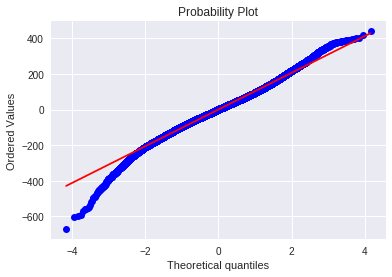

In [31]:
stats.probplot(cleaned2['residualsb'], dist="norm", plot=plt)

plt.show()

In [32]:
cleaned2['residuals'] = cleaned['residuals'].values
cleaned2['predictions'] = cleaned['predictions'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
cleaned2[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residualsb', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,predictions,predictionsb,residuals,residualsb
48972,58.000000,M,176.0,115.0,0,817.096770,785.247887,-702.096770,-670.247887
15156,56.666667,M,137.4,75.0,0,686.344274,676.529589,-611.344274,-601.529589
8671,71.500000,M,121.0,105.0,1,703.497162,700.364976,-598.497162,-595.364976
27142,46.000000,M,149.8,125.0,0,731.328860,715.744176,-606.328860,-590.744176
16582,51.888889,M,125.6,75.0,0,647.547559,642.617636,-572.547559,-567.617636
44228,33.000000,M,220.2,347.5,0,973.946208,908.189786,-626.446208,-560.689786
56606,18.000000,M,104.9,106.6,1,663.186369,665.510010,-556.586369,-558.910010
22157,43.500000,M,95.5,75.0,1,624.406064,627.134852,-549.406064,-552.134852
50973,15.162791,M,96.9,95.0,1,636.775505,640.189585,-541.775505,-545.189585
6039,14.000000,M,150.9,195.0,0,743.663487,728.383032,-548.663487,-533.383032


In [34]:
cleaned2[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions', 'predictionsb', 'residuals', 'residualsb']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,predictionsb,residuals,residualsb
71219,27.0,M,98.11,1080.0,1,105,637.704829,640.681116,442.295171,439.318884
74194,29.0,M,99.48,1047.5,1,100,641.820847,644.599302,405.679153,402.900698
70781,25.0,M,92.15,1022.5,1,93,617.998179,621.398194,404.501821,401.101806
70782,28.0,M,92.06,1017.5,1,93,616.886388,620.205157,400.613612,397.294843
70820,30.0,M,116.58,1095.0,1,120,699.634896,698.984316,395.365104,396.015684
73819,40.0,M,104.39,1047.5,1,105,655.542738,657.338298,391.957262,390.161702
73342,31.0,M,100.00,1035.0,1,100,643.049712,645.713078,391.950288,389.286922
72951,27.0,M,104.16,1050.0,1,105,658.254572,660.449660,391.745428,389.550340
75432,26.0,M,104.92,1050.5,1,105,661.104725,663.202117,389.395275,387.297883
30242,30.0,M,170.68,1272.5,1,120+,883.393757,856.659052,389.106243,415.840948


In [35]:
display (cleaned2.groupby('SexBinary').min()['residualsb'])
display (cleaned2.groupby('SexBinary').min()['residuals'])

SexBinary
0   -670.247887
1   -418.341067
Name: residualsb, dtype: float64

SexBinary
0   -702.096770
1   -445.719724
Name: residuals, dtype: float64

In [36]:
display (cleaned2.groupby('SexBinary').max()['residualsb'])
display (cleaned2.groupby('SexBinary').max()['residuals'])

SexBinary
0    439.318884
1    290.611027
Name: residualsb, dtype: float64

SexBinary
0    442.295171
1    291.289029
Name: residuals, dtype: float64

In [37]:
cleaned2.groupby(['SexBinary', 'EquipmentBinary']).max()['residualsb']

SexBinary  EquipmentBinary
0          0                  379.137034
           1                  439.318884
1          0                  233.906088
           1                  290.611027
Name: residualsb, dtype: float64

Women are getting eclipsed by men on both sides in the equation as it stands now. There are two things that could be done to fix this: either add interaction terms (so gender * other features), or split up men and women and find separate sets of coefficients. I have decided to separate out men and women for a few reasons. They are as follows:
- every added feature is added complexity to the formula we are predicting. Although I don't anticipate this formula being adopted any time soon, I still intend to build something that is easy to understand/implement. 
- Wilks score has separate coefficient values for men and women, maybe I don't need to completely break the wheel here.
- it really seems like there is something non-linear about men and women's relative strength, that can't be measured by simply turning on/off a value.

I will also try to capture the age-total relationship (seems non-linear as well) and add a column for super heavyweights. 

In [38]:
is_SHW = []
for row in cleaned.iterrows():
    if (row[1]['BodyweightKg'] > 84 and row[1]['SexBinary'] == 1) or (row[1]['BodyweightKg'] > 120 and row[1]['SexBinary'] == 0):
        is_SHW.append(1)
    else:
        is_SHW.append(0)

In [39]:
cleaned['is_SHW'] = is_SHW

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Created a polynomial feature for Age

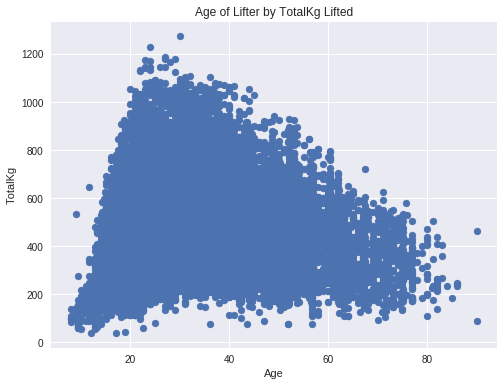

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned['Age'], cleaned['TotalKg'])
plt.title('Age of Lifter by TotalKg Lifted')
plt.xlabel('Age')
plt.ylabel('TotalKg')
plt.show()

In [43]:
cleaned['Age_squared'] = cleaned.Age.apply(lambda x: x**2)

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
cleaned['BW/E'] = cleaned['BodyweightKg'].values * cleaned['EquipmentBinary'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
cleaned['BodyweightKg_twothirds'] = cleaned['BodyweightKg']**(2/3)
cleaned['allo_BW/E'] = cleaned['BodyweightKg_twothirds'].values * cleaned['EquipmentBinary'].values

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Fit Separate Models for Men and Women

In [46]:
# separate data into men and women:
men = cleaned[cleaned['SexBinary'] == 0]
women = cleaned[cleaned['SexBinary'] == 1]

In [47]:
# fit model for men 

Xm = men[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
ym = men['TotalKg']

In [48]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, random_state = 42)

In [49]:
en_paramsm = {
    'alpha': np.logspace(-1, 2, 10), 
    'l1_ratio': np.linspace(0, 1, 5)
}

en_gridm = GridSearchCV(ElasticNet(), en_paramsm, cv = 5)
en_gridm.fit(X_trainm, y_trainm)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), 'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [50]:
en_gridm.score(X_testm, y_testm)

0.51173351305283221

In [51]:
list(zip(Xm.columns, en_gridm.best_estimator_.coef_))

[('BodyweightKg_twothirds', 24.819642664441535),
 ('Age', 18.375655797857913),
 ('Age_squared', -0.2476227223673437),
 ('allo_BW/E', 5.0131176699225009),
 ('is_SHW', -65.217066306031157),
 ('EquipmentBinary', -1.5166181769881544)]

In [52]:
en_gridm.best_estimator_.intercept_

-241.26077341718803

In [53]:
Xw = women[['BodyweightKg_twothirds', 'Age', 'Age_squared', 'allo_BW/E', 'is_SHW', 'EquipmentBinary']]
yw = women['TotalKg']

X_trainw, X_testw, y_trainw, y_testw = train_test_split(Xw, yw, random_state = 42)

en_paramsw = {
    'alpha': np.logspace(-1, 2, 10), 
    'l1_ratio': np.linspace(0, 1, 5)
}

en_gridw = GridSearchCV(ElasticNet(), en_paramsw, cv = 5)
en_gridw.fit(X_trainw, y_trainw)

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]), 'alpha': array([   0.1    ,    0.21544,    0.46416,    1.     ,    2.15443,
          4.64159,   10.     ,   21.54435,   46.41589,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
en_gridw.score(X_testw, y_testw)

0.41210756620556599

In [56]:
list(zip(Xw.columns, en_gridw.best_estimator_.coef_))

[('BodyweightKg_twothirds', 13.130379588213952),
 ('Age', 12.031817623962967),
 ('Age_squared', -0.16316063594572669),
 ('allo_BW/E', 4.7812144520561661),
 ('is_SHW', -35.523196813132202),
 ('EquipmentBinary', -0.0)]

In [57]:
en_gridw.best_estimator_.intercept_

-107.16120055597497

# Validation - EDA

In [58]:
# get predictions and residuals for men + women

predictions_m = en_gridm.predict(Xm)
predictions_w = en_gridw.predict(Xw)

residuals_m = men['TotalKg'].values - predictions_m
residuals_w = women['TotalKg'].values - predictions_w

men['residuals'] = residuals_m
women['residuals'] = residuals_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


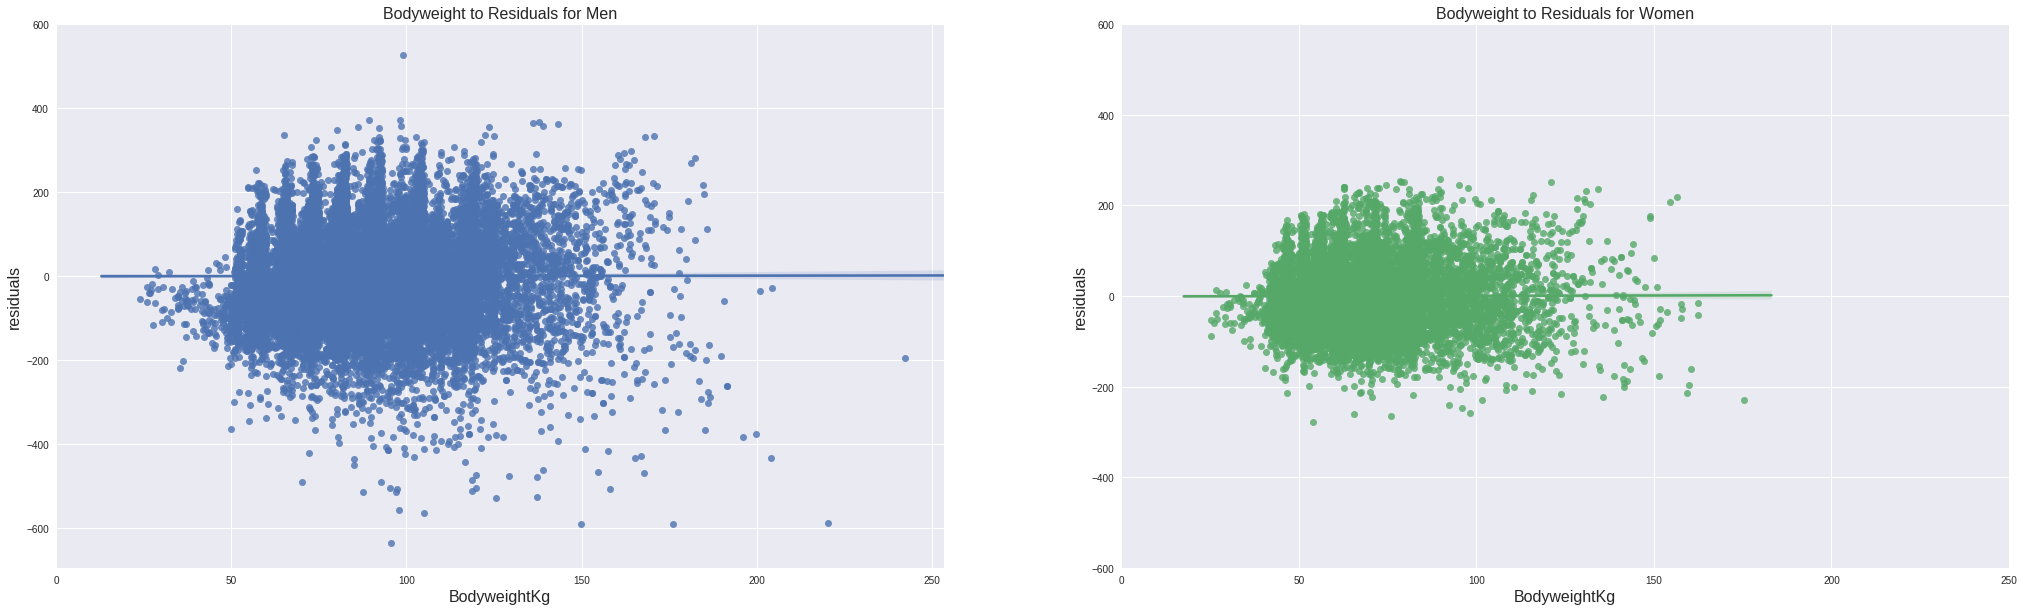

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10))

sns.regplot(men['BodyweightKg'], men['residuals'], ax=axes[0])
sns.regplot(women['BodyweightKg'], women['residuals'], ax=axes[1])
axes[0].set_title('Bodyweight to Residuals for Men')
axes[1].set_title('Bodyweight to Residuals for Women')
for ax in axes:
    plt.sca(ax)
    plt.yticks([-600, -400, -200, 0, 200, 400, 600])
    plt.xticks([0, 50, 100, 150, 200, 250])
    ax.title.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.xaxis.label.set_fontsize(16)
plt.show()

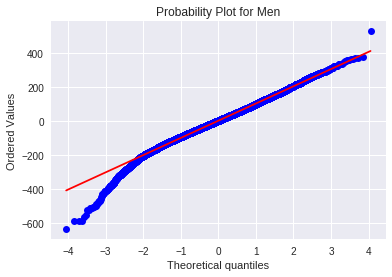

In [62]:
# probability plot for men's residuals (compared to a normal distribution)
stats.probplot(men['residuals'], dist="norm", plot=plt)
plt.title('Probability Plot for Men')
plt.show()

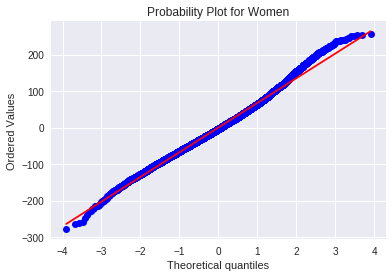

In [61]:
# probability plot for women's residuals (compared to a normal distribution)
stats.probplot(women['residuals'], dist="norm", plot=plt)
plt.title('Probability Plot for Women')
plt.show()

In [63]:
men['predictions'] = predictions_m
women['predictions'] = predictions_w

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
1293,90.000000,M,99.10,465.0,0,105,-61.685981,526.685981
71219,27.000000,M,98.11,1080.0,1,105,707.451597,372.548403
37953,22.462372,M,89.30,914.0,0,90,542.424644,371.575356
73855,23.000000,M,137.94,1147.5,1,120+,780.094165,367.405835
68932,22.000000,M,136.20,1130.0,1,120+,766.149738,363.850262
75462,24.000000,M,143.20,1170.0,1,120+,806.951877,363.048123
1335,81.250000,M,98.60,505.0,0,105,146.784907,358.215093
73312,24.000000,M,138.92,1147.5,1,NaN,790.599330,356.900670
33346,82.000000,M,86.10,440.0,0,93,84.474620,355.525380
73650,20.000000,M,123.56,1055.0,1,125,700.549633,354.450367


In [65]:
men[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
22157,43.500000,M,95.5,75.0,1,105,711.297473,-636.297473
48972,58.000000,M,176.0,115.0,0,120+,705.785552,-590.785552
27142,46.000000,M,149.8,125.0,0,120+,714.895016,-589.895016
44228,33.000000,M,220.2,347.5,0,120+,935.310078,-587.810078
56606,18.000000,M,104.9,106.6,1,105,671.309913,-564.709913
56605,27.000000,M,98.0,149.7,1,105,706.977168,-557.277168
16582,51.888889,M,125.6,75.0,0,125+,602.776095,-527.776095
15156,56.666667,M,137.4,75.0,0,125+,600.541296,-525.541296
60867,36.000000,M,87.6,75.0,0,90,588.895148,-513.895148
50973,15.162791,M,96.9,95.0,1,105,608.292550,-513.292550


In [66]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=False).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
74320,27.0,F,89.76,680.0,1,90,422.309128,257.690872
68262,24.0,F,78.62,670.5,1,84,416.339476,254.160524
68794,22.0,F,78.89,660.5,1,84,408.038786,252.461214
74895,21.0,F,79.69,657.5,1,84,405.246498,252.253502
73518,27.0,F,120.95,753.0,1,84+,501.295168,251.704832
59832,27.0,F,95.10,682.5,1,90+,436.413057,246.086943
73252,19.0,F,74.52,625.0,1,75,379.729897,245.270103
68241,36.0,F,62.62,638.5,1,63,396.978939,241.521061
73487,35.0,F,62.84,638.0,1,63,397.192688,240.807312
74001,35.0,F,62.60,636.0,1,NaN,396.471383,239.528617


In [67]:
women[['Age', 'Sex', 'BodyweightKg', 'TotalKg', 'EquipmentBinary','WeightClassKg', 'predictions','residuals']].sort_values('residuals', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
56553,19.000000,F,53.97,40.8,1,57,318.343509,-277.543509
10406,18.711864,F,76.10,117.5,1,84,382.503748,-265.003748
69943,29.000000,F,65.42,135.0,1,72,395.352474,-260.352474
7937,48.571429,F,98.30,180.0,1,90+,438.299913,-258.299913
55698,43.500000,F,96.00,200.0,1,NaN,447.492203,-247.492203
48601,21.840278,F,92.40,167.9,1,90+,408.351828,-240.451828
26505,20.000000,F,101.60,192.5,1,84+,422.686595,-230.186595
41154,19.481953,F,175.50,212.5,0,84+,441.379222,-228.879222
63840,41.500000,F,135.71,325.0,1,90+,548.648237,-223.648237
31423,50.989583,F,70.70,165.0,1,72,388.381807,-223.381807


In [68]:
men[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
287,86.0,M,65.20,245.0,0,66,-90.309203,335.309203
1293,90.0,M,99.10,465.0,0,105,-61.685981,526.685981
12097,82.0,M,57.20,222.5,0,59,-31.010037,253.510037
12099,86.0,M,80.60,242.5,0,83,-29.260543,271.760543
23997,86.0,M,81.10,235.0,0,83,-27.347252,262.347252
71938,82.0,M,72.45,265.0,0,74,31.869191,233.130809
12098,82.0,M,73.00,250.0,0,74,34.049441,215.950559
48961,80.0,M,63.20,200.0,0,66,37.804331,162.195669
60801,84.0,M,66.20,235.0,1,67.5,41.752880,193.247120
43394,82.0,M,76.30,262.5,0,83,47.017968,215.482032


In [69]:
women[['Age', 'Sex', 'BodyweightKg', \
     'TotalKg', 'EquipmentBinary',\
     'WeightClassKg', 'predictions','residuals']].sort_values('predictions', ascending=True).head(10)

,Age,Sex,BodyweightKg,TotalKg,EquipmentBinary,WeightClassKg,predictions,residuals
40852,90.000000,F,71.34,90.0,0,72,-120.042218,210.042218
27034,85.000000,F,89.80,182.5,0,84+,-35.509039,218.009039
72291,75.000000,F,46.77,215.0,0,47,47.893348,167.106652
47405,74.818182,F,47.80,207.5,0,52,52.643552,154.856448
27681,80.000000,F,99.00,195.0,0,84+,56.629335,138.370665
72294,75.000000,F,52.15,180.0,0,57,60.725875,119.274125
47406,74.818182,F,52.00,177.5,0,52,62.631098,114.868902
68600,74.000000,F,51.24,160.0,0,52,70.866634,89.133366
69359,73.000000,F,46.42,222.5,0,47,71.273845,151.226155
68602,77.000000,F,70.20,170.0,0,72,75.353342,94.646658


so we're getting negative predictions for both men and women who are 80 and older, this is something to fix in the model

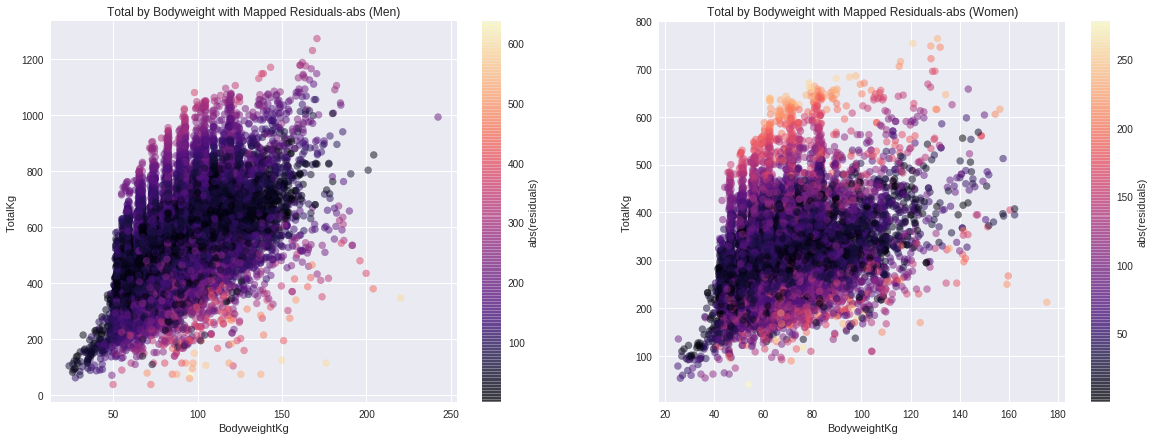

In [70]:
# plot TotalKg by Bodyweight and map the absolute value of the residuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

m = axes[0].scatter(men['BodyweightKg'], men['TotalKg'], c=abs(men['residuals']), cmap='magma', alpha=.5)
cbar1 = plt.colorbar(mappable=m, ax=axes[0])
cbar1.set_label('abs(residuals)')
axes[0].set_xlabel('BodyweightKg')
axes[0].set_ylabel('TotalKg')
axes[0].set_title('Total by Bodyweight with Mapped Residuals-abs (Men)')

w = axes[1].scatter(women['BodyweightKg'], women['TotalKg'], c=abs(women['residuals']), cmap='magma', alpha=.5)
cbar2 = plt.colorbar(mappable=w)
cbar2.set_label('abs(residuals)')
axes[1].set_xlabel('BodyweightKg')
axes[1].set_ylabel('TotalKg')
axes[1].set_title('Total by Bodyweight with Mapped Residuals-abs (Women)')

plt.show()

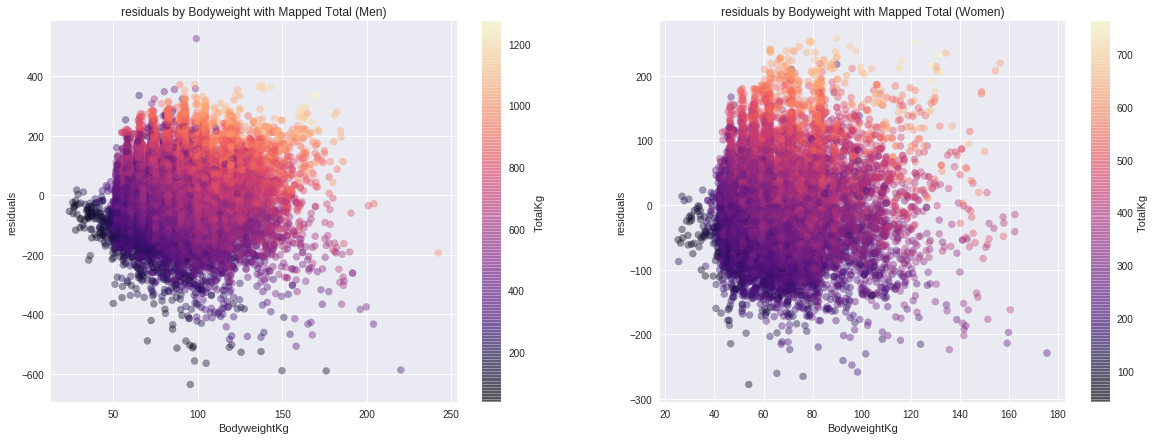

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

m = axes[0].scatter(men['BodyweightKg'], men['residuals'], c=men['TotalKg'], cmap='magma', alpha=.4)
cbar1 = plt.colorbar(mappable=m, ax=axes[0])
cbar1.set_label('TotalKg')
axes[0].set_xlabel('BodyweightKg')
axes[0].set_ylabel('residuals')
axes[0].set_title('residuals by Bodyweight with Mapped Total (Men)')

w = axes[1].scatter(women['BodyweightKg'], women['residuals'], c=women['TotalKg'], cmap='magma', alpha=.4)
cbar2 = plt.colorbar(mappable=w)
cbar2.set_label('TotalKg')
axes[1].set_xlabel('BodyweightKg')
axes[1].set_ylabel('residuals')
axes[1].set_title('residuals by Bodyweight with Mapped Total (Women)')

plt.show()

# Validation - Meet Simulation

next thing to do to try and see if the model is fair is to simulate meets and then check if any weight class wins more frequently than the others, we will do this by taking samples of 40 (usually about the size of a meet) and then selecting the winner based on highest Residual Score. we will then append that winners info into a dataframe

In [73]:
# simulate (10,000) meets

# set dictionaries for residuals
best_lifter_dic_w = {}
best_lifter_dic_m = {}
# set dictionaries for wilks
best_lifter_dic_w_wilks = {}
best_lifter_dic_m_wilks = {}

for i in range(10000):
    meet_w = women.sample(40, random_state=i)
    meet_m = men.sample(40, random_state=i)
    winner_w = meet_w.sort_values('residuals', ascending=False).head(1)
    winner_m = meet_m.sort_values('residuals', ascending=False).head(1)
    meet_w_wilks = women.sample(40, random_state=i)
    meet_m_wilks = men.sample(40, random_state=i)
    winner_w_wilks = meet_w_wilks.sort_values('calcWilks', ascending=False).head(1)
    winner_m_wilks = meet_m_wilks.sort_values('calcWilks', ascending=False).head(1)
    
    for row in winner_w.iterrows():
        best_lifter_dic_w['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_m.iterrows():
        best_lifter_dic_m['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_w_wilks.iterrows():
        best_lifter_dic_w_wilks['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
    for row in winner_m_wilks.iterrows():
        best_lifter_dic_m_wilks['meet{}'.format(i)] = {
            'BodyweightKg': row[1]['BodyweightKg'],
            'TotalKg':  row[1]['TotalKg'],
            'residual': row[1]['residuals'],
            'Age': row[1]['Age'],
            'Equipment': row[1]['Equipment'],
            'Wilks': row[1]['calcWilks']
        }
        
best_lifter_df_m = pd.DataFrame(best_lifter_dic_m).T
best_lifter_df_w = pd.DataFrame(best_lifter_dic_w).T
best_lifter_df_w_wilks = pd.DataFrame(best_lifter_dic_w_wilks).T
best_lifter_df_m_wilks = pd.DataFrame(best_lifter_dic_m_wilks).T

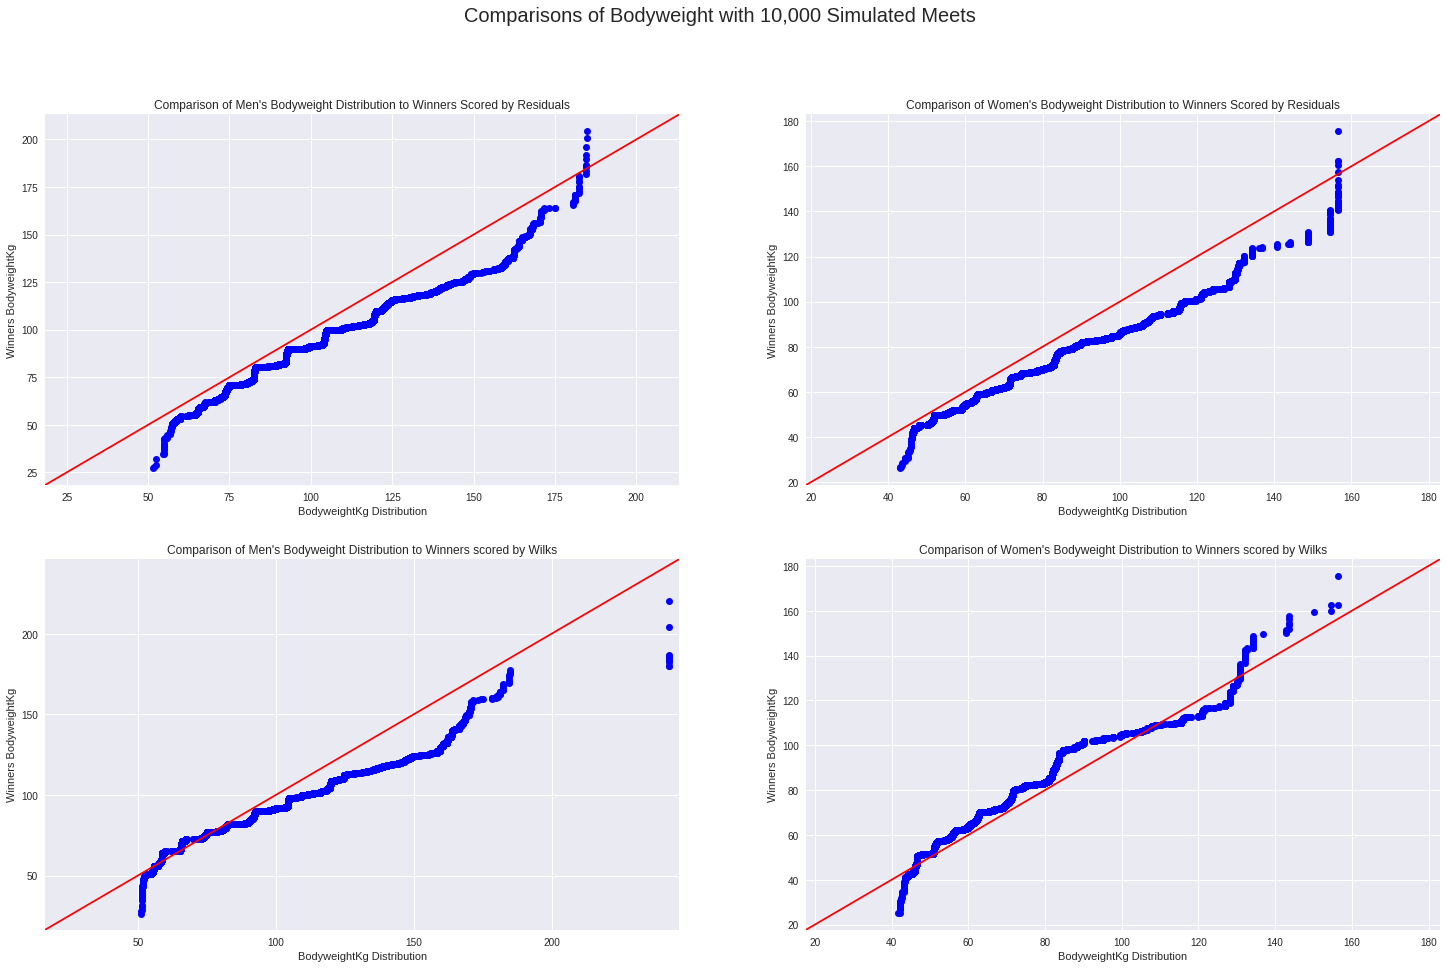

In [74]:
# plot data
from statsmodels.graphics.gofplots import qqplot_2samples

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
fig.suptitle ('Comparisons of Bodyweight with 10,000 Simulated Meets', fontsize=20)


qqplot_2samples(men['BodyweightKg'].sample(10000), best_lifter_df_m['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[0][0])
axes[0][0].set_title("Comparison of Men's Bodyweight Distribution to Winners Scored by Residuals")

qqplot_2samples(women['BodyweightKg'].sample(10000), best_lifter_df_w['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[0][1])
axes[0][1].set_title("Comparison of Women's Bodyweight Distribution to Winners Scored by Residuals")


qqplot_2samples(men['BodyweightKg'].sample(10000), best_lifter_df_m_wilks['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[1][0])
axes[1][0].set_title("Comparison of Men's Bodyweight Distribution to Winners scored by Wilks")

qqplot_2samples(women['BodyweightKg'].sample(10000), best_lifter_df_w_wilks['BodyweightKg'],\
                xlabel='BodyweightKg Distribution', ylabel='Winners BodyweightKg', line='45', ax=axes[1][1])
axes[1][1].set_title("Comparison of Women's Bodyweight Distribution to Winners scored by Wilks")

plt.show()

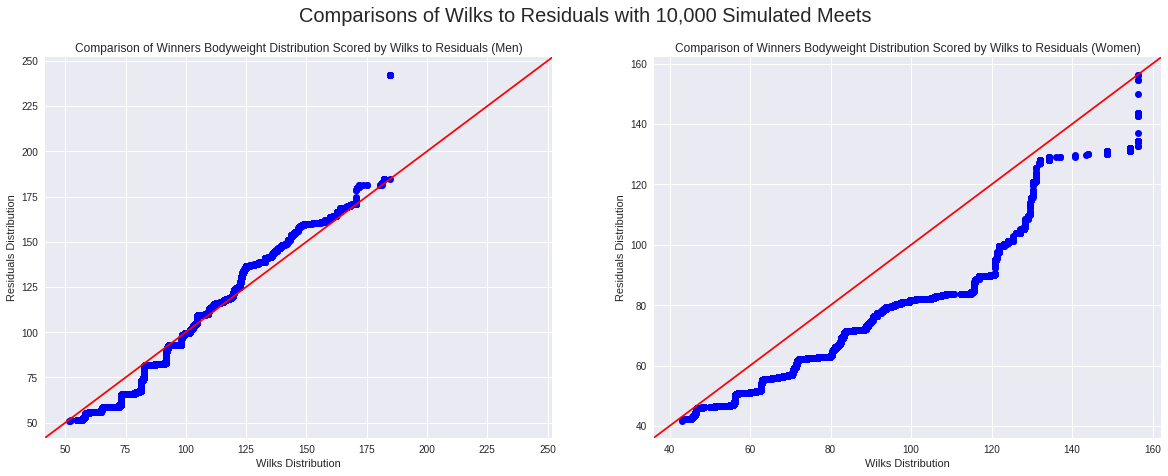

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle ('Comparisons of Wilks to Residuals with 10,000 Simulated Meets', fontsize=20)
qqplot_2samples(best_lifter_df_m_wilks['BodyweightKg'], best_lifter_df_m['BodyweightKg'],\
                xlabel='Wilks Distribution', ylabel='Residuals Distribution', line='45', ax=axes[0])
axes[0].set_title("Comparison of Winners Bodyweight Distribution Scored by Wilks to Residuals (Men)")

qqplot_2samples(best_lifter_df_w_wilks['BodyweightKg'], best_lifter_df_w['BodyweightKg'],\
                xlabel='Wilks Distribution', ylabel='Residuals Distribution', line='45', ax=axes[1])
axes[1].set_title("Comparison of Winners Bodyweight Distribution Scored by Wilks to Residuals (Women)")
plt.show()

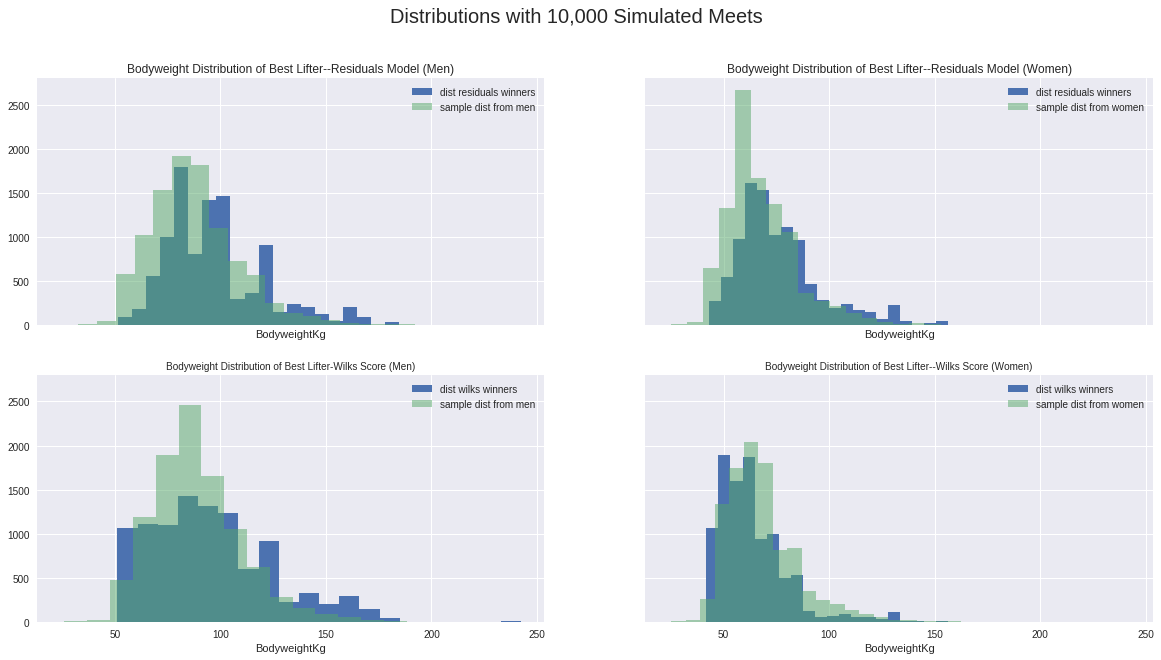

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Distributions with 10,000 Simulated Meets', fontsize=20)
a = best_lifter_df_m['BodyweightKg'].hist(ax=axes[0][0], bins=20, label='dist residuals winners')
a = men.sample(10000)['BodyweightKg'].hist(ax=axes[0][0], bins=20, label='sample dist from men', alpha=.5)
a.legend()
axes[0][0].set_xlabel('BodyweightKg')
axes[0][0].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Men)')

b = best_lifter_df_w['BodyweightKg'].hist(ax=axes[0][1], bins=20, label='dist residuals winners')
b = women.sample(10000)['BodyweightKg'].hist(ax=axes[0][1], bins=20, label='sample dist from women', alpha=.5)
b.legend()
axes[0][1].set_xlabel('BodyweightKg')
axes[0][1].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Women)')

c = best_lifter_df_m_wilks['BodyweightKg'].hist(bins= 20, ax=axes[1][0], label='dist wilks winners')
c = men['BodyweightKg'].sample(10000).hist(bins= 20, ax=axes[1][0], alpha=.5, label='sample dist from men')
c.legend()
axes[1][0].set_xlabel('BodyweightKg')
axes[1][0].set_title('Bodyweight Distribution of Best Lifter-Wilks Score (Men)', fontsize=10)

d = best_lifter_df_w_wilks['BodyweightKg'].hist(bins= 20, ax=axes[1][1], label='dist wilks winners')
d = women['BodyweightKg'].sample(10000).hist(bins= 20, ax=axes[1][1], label='sample dist from women', alpha=.5)
d.legend()
axes[1][1].set_xlabel('BodyweightKg')
axes[1][1].set_title('Bodyweight Distribution of Best Lifter--Wilks Score (Women)', fontsize=10)


plt.show()

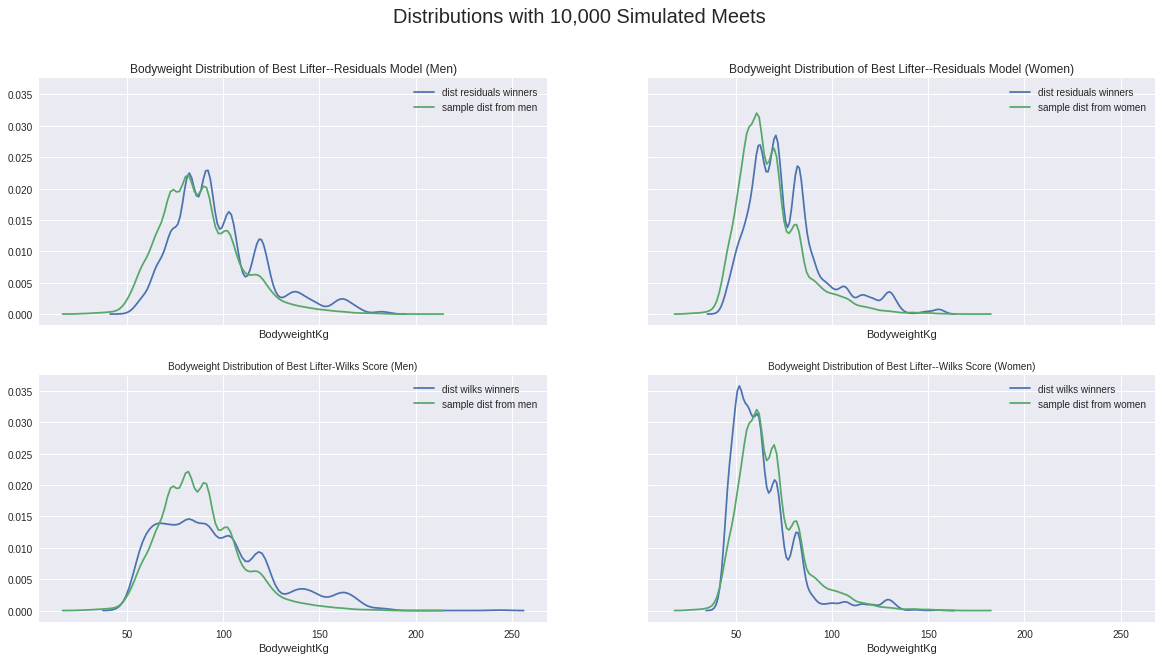

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Distributions with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['BodyweightKg'], ax=axes[0][0], hist=False, bins=20, label='dist residuals winners')
a = sns.distplot(men.sample(10000, random_state=0)['BodyweightKg'], ax=axes[0][0], hist=False, bins=20, label='sample dist from men')
a.legend()
axes[0][0].set_xlabel('BodyweightKg')
axes[0][0].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Men)')

b = sns.distplot(best_lifter_df_w['BodyweightKg'], ax=axes[0][1], hist=False, bins=20, label='dist residuals winners')
b = sns.distplot(women.sample(10000, random_state=0)['BodyweightKg'], ax=axes[0][1], hist=False, bins=20, label='sample dist from women')
b.legend()
axes[0][1].set_xlabel('BodyweightKg')
axes[0][1].set_title('Bodyweight Distribution of Best Lifter--Residuals Model (Women)')

c = sns.distplot(best_lifter_df_m_wilks['BodyweightKg'], ax=axes[1][0], hist=False, bins=20, label='dist wilks winners')
c = sns.distplot(men.sample(10000, random_state=0)['BodyweightKg'], ax=axes[1][0], hist=False, bins=20, label='sample dist from men')
c.legend()
axes[1][0].set_xlabel('BodyweightKg')
axes[1][0].set_title('Bodyweight Distribution of Best Lifter-Wilks Score (Men)', fontsize=10)

d = sns.distplot(best_lifter_df_w_wilks['BodyweightKg'], ax=axes[1][1], hist=False, bins=20, label='dist wilks winners')
d = sns.distplot(women.sample(10000, random_state=0)['BodyweightKg'], ax=axes[1][1], hist=False, bins=20, label='sample dist from women')
d.legend()
axes[1][1].set_xlabel('BodyweightKg')
axes[1][1].set_title('Bodyweight Distribution of Best Lifter--Wilks Score (Women)', fontsize=10)


plt.show()

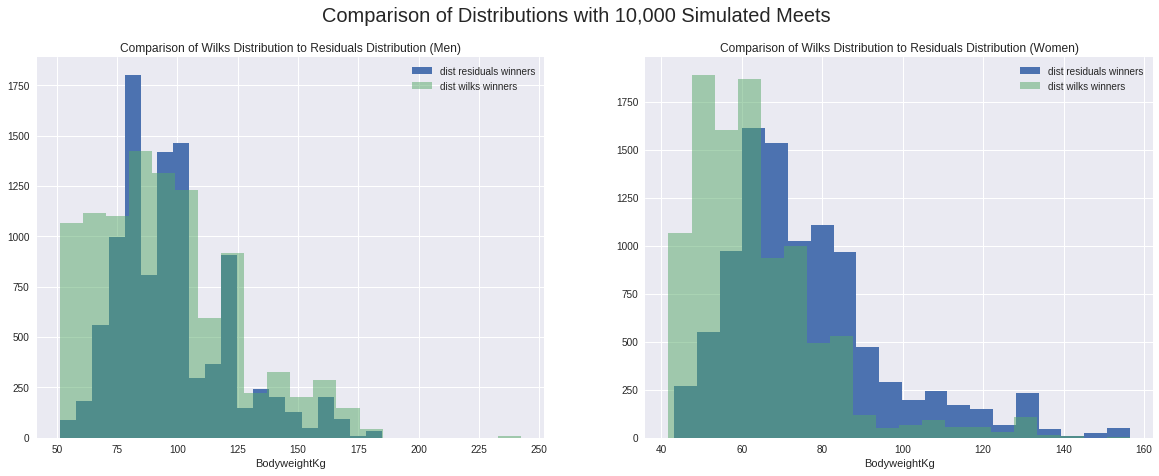

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle ('Comparison of Distributions with 10,000 Simulated Meets', fontsize=20)
a = best_lifter_df_m['BodyweightKg'].hist(ax=axes[0], bins=20, label='dist residuals winners')
a = best_lifter_df_m_wilks['BodyweightKg'].hist(ax=axes[0], bins=20, label='dist wilks winners', alpha=.5)
a.legend()
axes[0].set_xlabel('BodyweightKg')
axes[0].set_title('Comparison of Wilks Distribution to Residuals Distribution (Men)')

b = best_lifter_df_w['BodyweightKg'].hist(ax=axes[1], bins=20, label='dist residuals winners')
b = best_lifter_df_w_wilks['BodyweightKg'].hist(ax=axes[1], bins=20, label='dist wilks winners', alpha=.5)
b.legend()
axes[1].set_xlabel('BodyweightKg')
axes[1].set_title('Comparison of Wilks Distribution to Residuals Distribution (Women)')
plt.show()

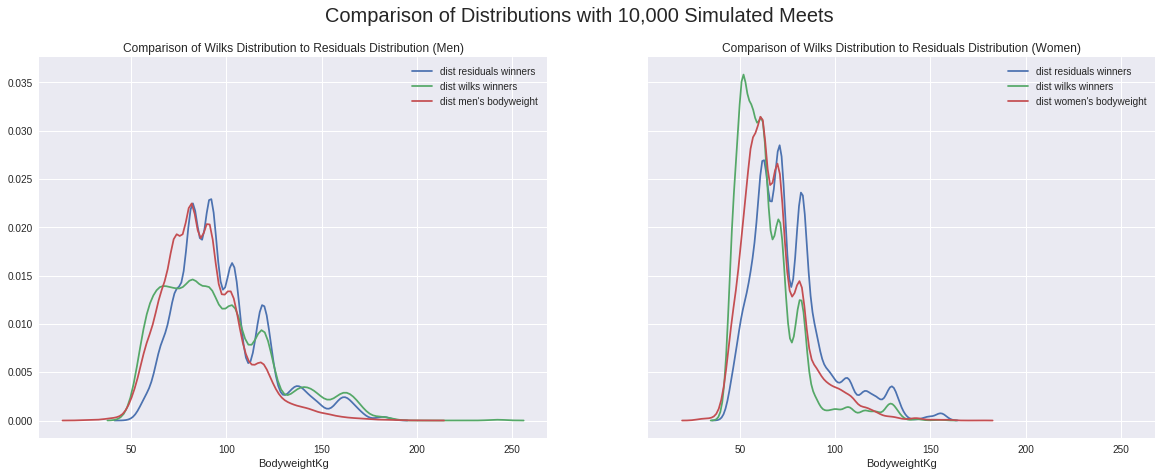

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), sharex=True, sharey=True)
fig.suptitle ('Comparison of Distributions with 10,000 Simulated Meets', fontsize=20)
a = sns.distplot(best_lifter_df_m['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist residuals winners')
a = sns.distplot(best_lifter_df_m_wilks['BodyweightKg'], ax=axes[0], bins=20, hist=False, label='dist wilks winners')
a = sns.distplot(men.sample(10000)['BodyweightKg'], ax=axes[0], bins=20, hist=False, label="dist men's bodyweight")
a.legend()
axes[0].set_xlabel('BodyweightKg')
axes[0].set_title('Comparison of Wilks Distribution to Residuals Distribution (Men)')

b = sns.distplot(best_lifter_df_w['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist residuals winners')
b = sns.distplot(best_lifter_df_w_wilks['BodyweightKg'], ax=axes[1], bins=20, hist=False, label='dist wilks winners')
b = sns.distplot(women.sample(10000)['BodyweightKg'], ax=axes[1], bins=20, hist=False, label="dist women's bodyweight")
b.legend()
axes[1].set_xlabel('BodyweightKg')
axes[1].set_title('Comparison of Wilks Distribution to Residuals Distribution (Women)')
plt.show()

In [82]:
from scipy.stats import ks_2samp

display(ks_2samp(best_lifter_df_m['BodyweightKg'], men.sample(10000)['BodyweightKg']))
display(ks_2samp(best_lifter_df_w['BodyweightKg'], women.sample(10000)['BodyweightKg']))
display(ks_2samp(best_lifter_df_m_wilks['BodyweightKg'], women.sample(10000)['BodyweightKg']))
display(ks_2samp(best_lifter_df_w_wilks['BodyweightKg'], women.sample(10000)['BodyweightKg']))

Ks_2sampResult(statistic=0.19090000000000001, pvalue=3.0711595725432773e-159)

Ks_2sampResult(statistic=0.21340000000000003, pvalue=6.9931674554821581e-199)

Ks_2sampResult(statistic=0.48709999999999998, pvalue=0.0)

Ks_2sampResult(statistic=0.15329999999999994, pvalue=7.7046976169816284e-103)

In [83]:
display(best_lifter_df_w.groupby('Equipment').count())
display(best_lifter_df_w_wilks.groupby('Equipment').count())
display(women.sample(10000).groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'calcWilks', 'residuals']])

,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,3689,3689,3689,3689,3689
Single-ply,6311,6311,6311,6311,6311


,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,755,755,755,755,755
Single-ply,9245,9245,9245,9245,9245


,Age,BodyweightKg,TotalKg,calcWilks,residuals
Equipment,,,,,
Raw,6746,6746,6746,6746,6746
Single-ply,3254,3254,3254,3254,3254


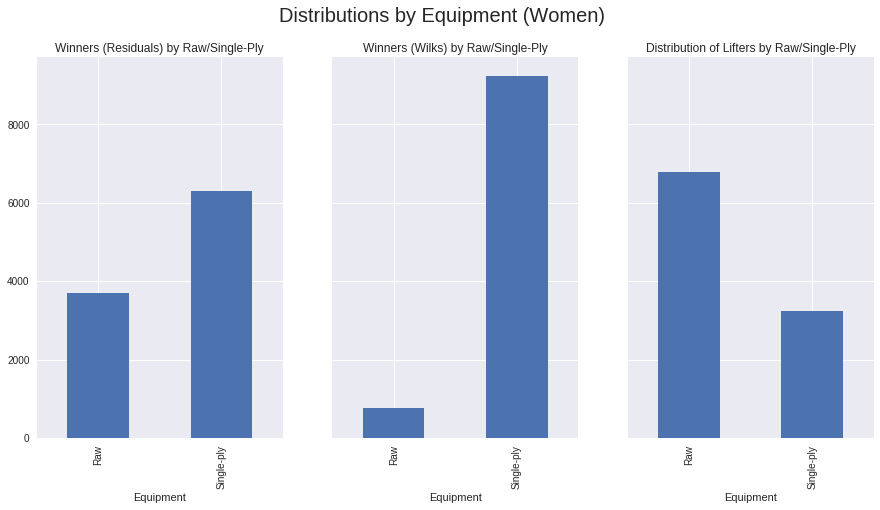

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
fig.suptitle('Distributions by Equipment (Women)', fontsize=20)
best_lifter_df_w.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[0], title='Winners (Residuals) by Raw/Single-Ply')
best_lifter_df_w_wilks.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[1], title='Winners (Wilks) by Raw/Single-Ply')
women.sample(10000).groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[2], title='Distribution of Lifters by Raw/Single-Ply')
plt.show()

In [85]:
display(best_lifter_df_m.groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'Wilks', 'residual']])
display(best_lifter_df_m_wilks.groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'Wilks', 'residual']])
display(men.sample(10000).groupby('Equipment').count()[['Age','BodyweightKg', 'TotalKg', 'calcWilks', 'residuals']])

,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,4695,4695,4695,4695,4695
Single-ply,5305,5305,5305,5305,5305


,Age,BodyweightKg,TotalKg,Wilks,residual
Equipment,,,,,
Raw,1079,1079,1079,1079,1079
Single-ply,8921,8921,8921,8921,8921


,Age,BodyweightKg,TotalKg,calcWilks,residuals
Equipment,,,,,
Raw,7323,7323,7323,7323,7323
Single-ply,2677,2677,2677,2677,2677


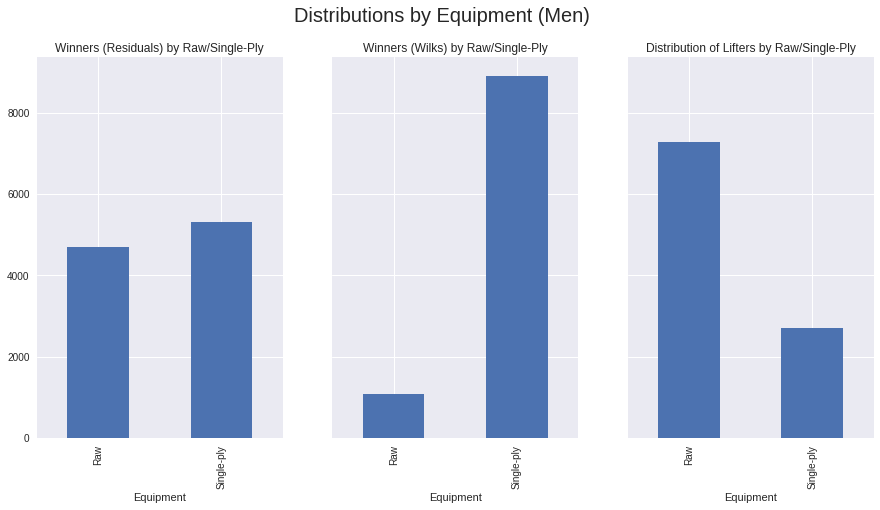

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
fig.suptitle('Distributions by Equipment (Men)', fontsize=20)
best_lifter_df_m.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[0], title='Winners (Residuals) by Raw/Single-Ply')
best_lifter_df_m_wilks.groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[1], title='Winners (Wilks) by Raw/Single-Ply')
men.sample(10000).groupby('Equipment').count()['Age'].plot(kind='bar', ax=axes[2], title='Distribution of Lifters by Raw/Single-Ply')
plt.show()

## WHO DOES THE RESIDUALS MODEL FAVOR OVER WILKS?

In [87]:
# scale wilks scores 

best_lifter_df_m['wilks_sc'] = \
(best_lifter_df_m['Wilks'].values - best_lifter_df_m['Wilks'].mean())/best_lifter_df_m['Wilks'].std()

best_lifter_df_w['wilks_sc'] = \
(best_lifter_df_w['Wilks'].values - best_lifter_df_w['Wilks'].mean())/best_lifter_df_w['Wilks'].std()

best_lifter_df_m_wilks['wilks_sc'] = \
(best_lifter_df_m_wilks['Wilks'].values - best_lifter_df_m_wilks['Wilks'].mean())/best_lifter_df_m_wilks['Wilks'].std()

best_lifter_df_w_wilks['wilks_sc'] = \
(best_lifter_df_w_wilks['Wilks'].values - best_lifter_df_w_wilks['Wilks'].mean())/best_lifter_df_w_wilks['Wilks'].std()


# scale residual score
best_lifter_df_m['residual_sc'] = \
(best_lifter_df_m['residual'].values - best_lifter_df_m['residual'].mean())/best_lifter_df_m['residual'].std()

best_lifter_df_w['residual_sc'] = \
(best_lifter_df_w['residual'].values - best_lifter_df_w['residual'].mean())/best_lifter_df_w['residual'].std()

best_lifter_df_m_wilks['residual_sc'] = \
(best_lifter_df_m_wilks['residual'].values - best_lifter_df_m_wilks['residual'].mean())/best_lifter_df_m_wilks['residual'].std()

best_lifter_df_w_wilks['residual_sc'] = \
(best_lifter_df_w_wilks['residual'].values - best_lifter_df_w_wilks['residual'].mean())/best_lifter_df_w_wilks['residual'].std()

best_lifter_df_m['distance'] = best_lifter_df_m['wilks_sc'] - best_lifter_df_m['residual_sc']
best_lifter_df_w['distance'] = best_lifter_df_w['wilks_sc'] - best_lifter_df_w['residual_sc']
best_lifter_df_m_wilks['distance'] = best_lifter_df_m_wilks['wilks_sc'] - best_lifter_df_m_wilks['residual_sc']
best_lifter_df_w_wilks['distance'] = best_lifter_df_w_wilks['wilks_sc'] - best_lifter_df_w_wilks['residual_sc']

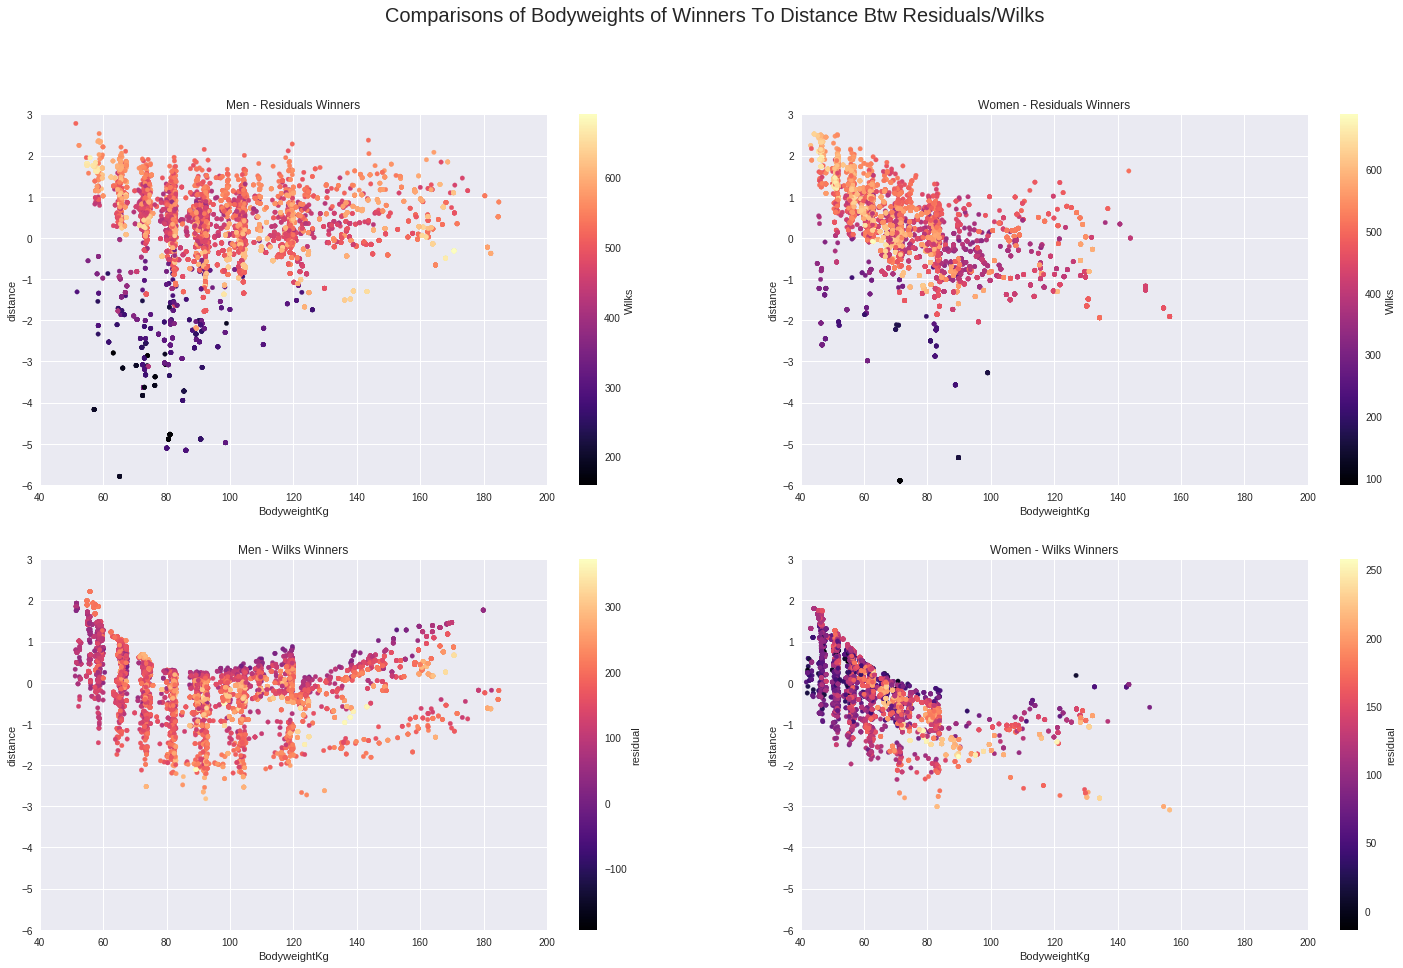

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
fig.suptitle ('Comparisons of Bodyweights of Winners To Distance Btw Residuals/Wilks', fontsize=20)


a = best_lifter_df_m.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[0][0], c='Wilks', cmap='magma', \
                         xlim = (40, 200), ylim=(-6, 3))
a.set_title('Men - Residuals Winners')

b = best_lifter_df_w.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[0][1], c='Wilks', cmap='magma', \
                          xlim = (40, 200), ylim=(-6, 3))
b.set_title('Women - Residuals Winners')


c = best_lifter_df_m_wilks.plot('BodyweightKg', 'distance',kind='scatter', ax=axes[1][0], c='residual', cmap='magma', \
                                xlim = (40, 200), ylim=(-6, 3))
c.set_title('Men - Wilks Winners')


d = best_lifter_df_w_wilks.plot('BodyweightKg', 'distance', kind='scatter', ax=axes[1][1], c='residual', cmap='magma', \
                                xlim = (40, 200), ylim=(-6, 3))
d.set_title('Women - Wilks Winners')



plt.show()

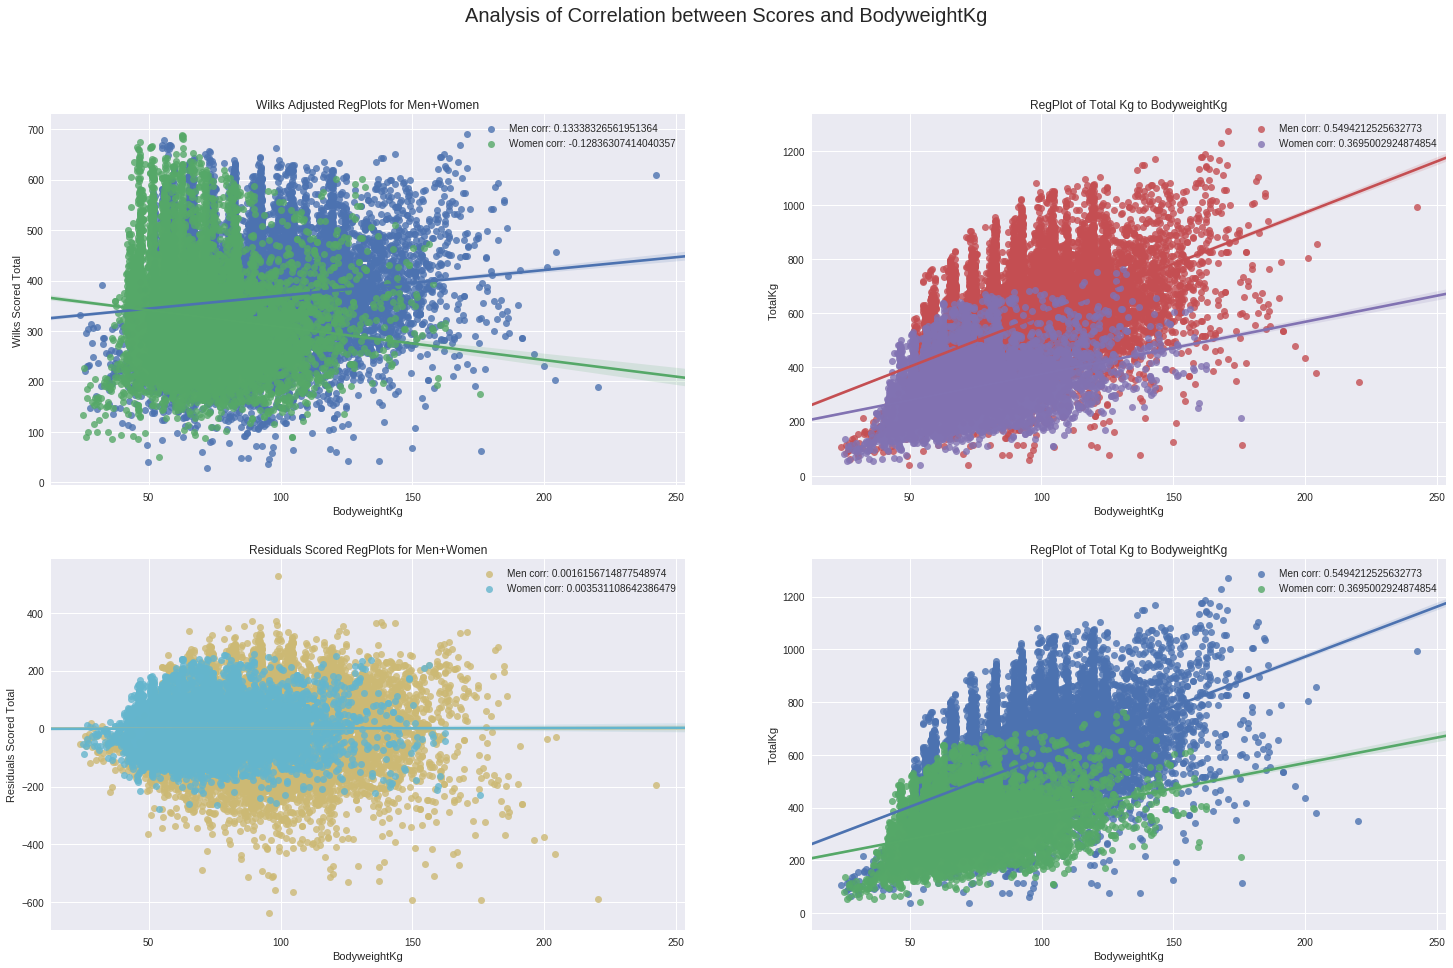

In [93]:
# create data to plot
x = men.BodyweightKg
y = men.calcWilks

w = women.BodyweightKg
t = women.calcWilks

xa = men.BodyweightKg
ya = men.TotalKg

wa = women.BodyweightKg
ta = women.TotalKg 

xb = men.BodyweightKg
yb = men.residuals

wb = women.BodyweightKg
tb = women.residuals


# get correlations 
cor1m = np.corrcoef(x, y)[0][1]
cor1w = np.corrcoef(w, t)[0][1]
cor2m = np.corrcoef(xa, ya)[0][1]
cor2w = np.corrcoef(wa, ta)[0][1]
cor3m = np.corrcoef(xb, yb)[0][1]
cor3w = np.corrcoef(wb, tb)[0][1]

# plot data

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
plt.suptitle('Analysis of Correlation between Scores and BodyweightKg', fontsize=(20))

sns.regplot(x, y, ax=axes[0][0], label='Men corr: {}'.format(cor1m))
sns.regplot(w, t, ax=axes[0][0], label='Women corr: {}'.format(cor1w))
axes[0][0].legend()
axes[0][0].set_ylabel("Wilks Scored Total")
axes[0][0].set_title('Wilks Adjusted RegPlots for Men+Women')

sns.regplot(xa, ya, ax=axes[0][1], label='Men corr: {}'.format(cor2m))
sns.regplot(wa, ta, ax=axes[0][1], label='Women corr: {}'.format(cor2w))
axes[0][1].legend()
axes[0][1].set_title('RegPlot of Total Kg to BodyweightKg')

sns.regplot(xb, yb, ax=axes[1][0], label='Men corr: {}'.format(cor3m))
sns.regplot(wb, tb, ax=axes[1][0], label='Women corr: {}'.format(cor3w))
axes[1][0].legend()
axes[1][0].set_ylabel("Residuals Scored Total")
axes[1][0].set_title('Residuals Scored RegPlots for Men+Women')

sns.regplot(xa, ya, ax=axes[1][1], label='Men corr: {}'.format(cor2m))
sns.regplot(wa, ta, ax=axes[1][1], label='Women corr: {}'.format(cor2w))
axes[1][1].legend()
axes[1][1].set_title('RegPlot of Total Kg to BodyweightKg')

plt.show()